# Shapes and Figures

## Circle

In [1]:
import matplotlib.pyplot as plt

In [2]:
def create_circle(r):
    circle = plt.Circle((0,0), radius = r) # a built-in function
    return circle

In [3]:
def show_shape(patch):
    ax = plt.gca() # returns a reference to the Axes
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()

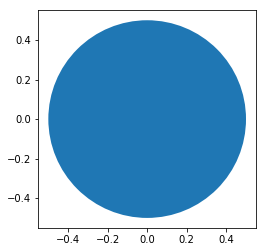

In [4]:
if __name__ == '__main__':
    c = create_circle(0.5)
    show_shape(c)

## Ellipse

In [5]:
def create_ellipse(w = 2, h=1):
    from matplotlib.patches import Ellipse
    ellipse = Ellipse((0,0), w, h) # a built-in function
    return ellipse

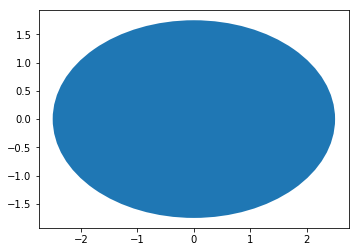

In [6]:
if __name__ == '__main__':
    c = create_ellipse(5, 3.5)
    show_shape(c)

## Rectangle

In [7]:
def create_polygon(w = 2, h=1):
    from matplotlib.patches import Rectangle
    rectangle = Rectangle((0,0), w, h) # a built-in function
    return rectangle

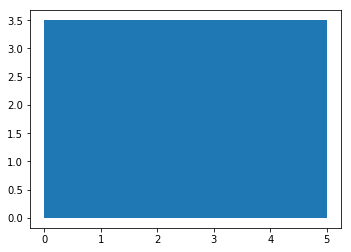

In [8]:
if __name__ == '__main__':
    c = create_polygon(5, 3.5)
    show_shape(c)

## Animated Figures

In [9]:
from matplotlib import pyplot as plt
from matplotlib import animation

In [10]:
def create_circle():
    circle = plt.Circle((0,0), 0.05) # a built-in function
    return circle

In [11]:
def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle,

In [12]:
def create_animation():
    fig = plt.figure()
    #fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_radius, fargs = (circle,), frames=30, interval=50, blit=True)
    plt.title('Simple Circle Animation')
    plt.show()

In [13]:
import matplotlib; matplotlib.use('TkAgg')
%matplotlib tk #still doesn't work
if __name__ == '__main__':
    create_animation()

## Aimating a Projectile's Trajectory

In [29]:
from matplotlib import pyplot as plt
from matplotlib import animation
import scipy.constants as const
import math

In [30]:
g = const.g

In [31]:
def get_intervals(u, theta):
    t_flight = 2 * u * math.sin(theta) / g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start += interval
    return intervals

In [32]:
def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * t * t
    circle.center = x, y
    return circle,

In [35]:
def create_animation(u, theta):
    
    intervals = get_intervals(u, theta)
    
    xmin = 0
    xmax = u * math.cos(theta) * intervals[-1]
    ymin = 0
    t_max = u * math.sin(theta) / g
    ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max ** 2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    anim = animation.FuncAnimation(fig, update_position,
                                   fargs=(circle, intervals, u, theta),
                                  frames=len(intervals), interval = 1,
                                  repeat=False)
    plt.title('Projectile Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [36]:
if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s): '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You entered an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

Enter the initial velocity (m/s): 25
Enter the angle of projection (degrees): 40


## Разбираем код

**update_position()** - функция перемещает центр окружности в каждом из фреймов. Фрейм создается для каждого нового временного интервала, так что их число соответствует количеству интервалов. Также обновляются координаты мяча.

**fargs** - функция update_position() должна иметь доступ к характеристикам: временным интевалам, начальной скорости, углу (тета), они и содержатся в аргументе.

**frames** - поскольку мы отображаем один фрейм за временной интвал, мы приводим число фреймов в соответствие со списком интервалов.

**repeat** - аргумент повтора для анимации, может принимать значения True и False.

# Drawing Fractals

In [1]:
import matplotlib.pyplot as plt
import random

In [2]:
def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1

In [3]:
def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

In [4]:
def transform(p):
    transformations = [transformation_1, transformation_2]
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

In [12]:
def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

Enter the number of iterations: 100


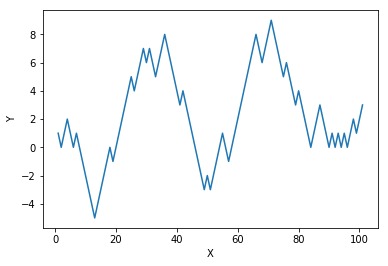

In [14]:
if __name__ == '__main__':
    p = (1, 1)
    n = int(input('Enter the number of iterations: '))
    x, y = build_trajectory(p, n)
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Drawing the Barnsley Fern

In [15]:
import matplotlib.pyplot as plt
import random

In [29]:
def transformation_1(p):
    x = p[0]
    y = p[1]
    x_1 = 0.85 * x + 0.04 * y
    y_1 = -0.04 * x + 0.85 * y + 1.6
    return x_1, y_1

In [17]:
def transformation_2(p):
    x = p[0]
    y = p[1]
    x_1 = 0.2 * x - 0.26 * y
    y_1 = 0.23 * x + 0.22 * y + 1.6
    return x_1, y_1

In [18]:
def transformation_3(p):
    x = p[0]
    y = p[1]
    x_1 = -0.15*x + 0.28 * y
    y_1 = 0.26 * x + 0.24 * y + 0.44
    return x_1, y_1

In [19]:
def transformation_4(p):
    x = p[0]
    y = p[1]
    x_1 = 0
    y_1 = 0.16 * y
    return x_1, y_1

In [20]:
def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

In [21]:
def transform(p):
    transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

In [24]:
def draw_fern(n):
    x = [0]
    y = [0]
    
    x_1, y_1 = 0, 0
    for i in range(n):
        x_1, y_1 = transform((x_1, y_1))
        x.append(x_1)
        y.append(y_1)
    return x, y

Enter the number of points in the Fern: 7392


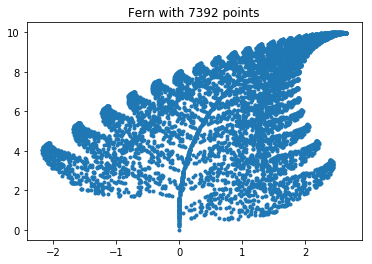

In [38]:
if __name__ == '__main__':
    n = int(input('Enter the number of points in the Fern: '))
    x, y = draw_fern(n)
    plt.plot(x, y, '.')
    plt.title('Fern with {0} points'.format(n))
    plt.show()